Importing necessary packages

In [1]:
import pandas as pd
import numpy as np
import pickle
import pefile
import joblib
import sklearn.ensemble as sk
from sklearn import model_selection, tree, linear_model
from sklearn.feature_selection import SelectFromModel
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn import svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Importing the dataset 

In [2]:
data=pd.read_csv(r"C:\Users\Alwin\OneDrive\Desktop\Data Analytics\Project\malware_dataset.csv",sep=',',low_memory=False)

Exploratory Data Analysis

In [3]:
data.head()

,ID,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,1,b69acb3bb133974e48229627663f96d4,332,224,8450,8.0,0,16896,8192,0,...,1,3.492126,3.492126,3.492126,864.0,864,864,72,0,1
1,2,1cbee4b3725629bd0aa6ac2ff500925f,332,224,258,9.0,0,84480,25600,0,...,1,3.486827,3.486827,3.486827,892.0,892,892,72,0,1
2,3,b7027cf0cd31c820928950cbfe7e91ef,332,224,8450,8.0,0,4608,3584,0,...,1,3.517270,3.517270,3.517270,952.0,952,952,72,0,1
3,4,156a0bb069f94d1e7c2508318805f2a4,332,224,8450,10.0,0,108544,15872,0,...,2,3.270559,3.034188,3.506931,1032.0,972,1092,72,0,1
4,5,c72bf851fed5542abba904b1f3944cd5,332,224,8226,48.0,0,513024,2048,0,...,1,3.420977,3.420977,3.420977,954.0,954,954,0,0,1


In [4]:
data.shape

(216352, 57)

The dataset comprises of 216352 rows and 57 columns 

In [5]:
data.describe()

,ID,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
count,216352.000000,216352.000000,216352.000000,216352.000000,216351.000000,216352.000000,2.163520e+05,2.163520e+05,2.163520e+05,2.163520e+05,...,216352.000000,216352.000000,216352.000000,216352.000000,2.163520e+05,2.163520e+05,2.163520e+05,2.163520e+05,216352.000000,216352.000000
mean,108176.500000,3280.509836,225.389698,4658.171110,8.899400,4.298070,3.953873e+05,5.827983e+05,1.332423e+06,2.812214e+05,...,21.311862,3.758008,2.391040,5.149422,9.997023e+04,7.139623e+04,2.524535e+05,1.023401e+06,7.888492,0.348982
std,62455.587057,9579.758901,4.554221,7844.088893,5.825695,11.965366,1.962775e+07,2.841106e+07,7.337809e+07,1.254327e+07,...,130.677344,1.270336,1.042123,1.864446,1.718201e+07,1.681531e+07,2.433613e+07,4.772522e+07,8.049384,0.476649
min,1.000000,332.000000,176.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,54088.750000,332.000000,224.000000,258.000000,7.000000,0.000000,2.560000e+04,1.536000e+04,0.000000e+00,1.253800e+04,...,2.000000,3.362966,2.010121,3.594461,7.755000e+02,3.800000e+01,9.680000e+02,0.000000e+00,0.000000,0.000000
50%,108176.500000,332.000000,224.000000,271.000000,9.000000,0.000000,1.018880e+05,1.198080e+05,0.000000e+00,4.661750e+04,...,6.000000,3.671986,2.458492,5.217124,1.601958e+03,4.800000e+01,7.336000e+03,0.000000e+00,0.000000,0.000000
75%,162264.250000,332.000000,224.000000,8450.000000,10.000000,0.000000,1.228800e+05,3.850240e+05,0.000000e+00,7.618000e+04,...,13.000000,4.194799,3.003092,6.122045,3.146400e+03,2.320000e+02,1.700500e+04,7.200000e+01,15.000000,1.000000
max,216352.000000,43620.000000,352.000000,49551.000000,255.000000,255.000000,4.294967e+09,4.294967e+09,4.294967e+09,4.127916e+09,...,8215.000000,7.999723,7.999723,8.000000,4.294903e+09,4.294903e+09,4.294903e+09,4.294967e+09,26.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216352 entries, 0 to 216351
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           216352 non-null  int64  
 1   md5                          216352 non-null  object 
 2   Machine                      216352 non-null  int64  
 3   SizeOfOptionalHeader         216352 non-null  int64  
 4   Characteristics              216352 non-null  int64  
 5   MajorLinkerVersion           216351 non-null  float64
 6   MinorLinkerVersion           216352 non-null  int64  
 7   SizeOfCode                   216352 non-null  int64  
 8   SizeOfInitializedData        216352 non-null  int64  
 9   SizeOfUninitializedData      216352 non-null  int64  
 10  AddressOfEntryPoint          216352 non-null  int64  
 11  BaseOfCode                   216352 non-null  int64  
 12  BaseOfData                   216352 non-null  int64  
 13 

In [7]:
data.count()

ID                             216352
md5                            216352
Machine                        216352
SizeOfOptionalHeader           216352
Characteristics                216352
MajorLinkerVersion             216351
MinorLinkerVersion             216352
SizeOfCode                     216352
SizeOfInitializedData          216352
SizeOfUninitializedData        216352
AddressOfEntryPoint            216352
BaseOfCode                     216352
BaseOfData                     216352
ImageBase                      216352
SectionAlignment               216352
FileAlignment                  216352
MajorOperatingSystemVersion    216352
MinorOperatingSystemVersion    216352
MajorImageVersion              216352
MinorImageVersion              216352
MajorSubsystemVersion          216352
MinorSubsystemVersion          216352
SizeOfImage                    216352
SizeOfHeaders                  216352
CheckSum                       216352
Subsystem                      216352
DllCharacter

Checking for null values 

In [8]:
data.isnull().sum()

ID                             0
md5                            0
Machine                        0
SizeOfOptionalHeader           0
Characteristics                0
MajorLinkerVersion             1
MinorLinkerVersion             0
SizeOfCode                     0
SizeOfInitializedData          0
SizeOfUninitializedData        0
AddressOfEntryPoint            0
BaseOfCode                     0
BaseOfData                     0
ImageBase                      0
SectionAlignment               0
FileAlignment                  0
MajorOperatingSystemVersion    0
MinorOperatingSystemVersion    0
MajorImageVersion              0
MinorImageVersion              0
MajorSubsystemVersion          0
MinorSubsystemVersion          0
SizeOfImage                    0
SizeOfHeaders                  0
CheckSum                       0
Subsystem                      0
DllCharacteristics             0
SizeOfStackReserve             0
SizeOfStackCommit              0
SizeOfHeapReserve              0
SizeOfHeap

Text(0.5, 1.0, 'Heatmap of missing values in the dataset')

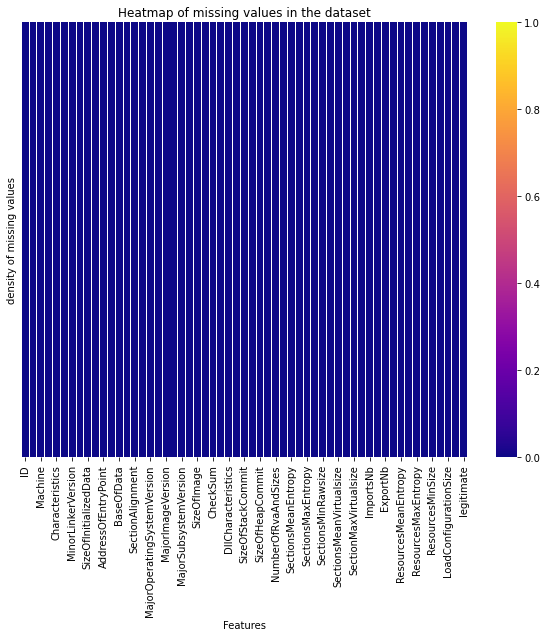

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(data.isnull(),yticklabels=False,cmap='plasma',cbar=True)
plt.xlabel('Features')
plt.ylabel('density of missing values')
plt.title('Heatmap of missing values in the dataset')

Since there is only 1 null value we can afford to drop it 

In [10]:
data.dropna(inplace=True)

Number of malicious files vs Legitimate files in the training set

In [11]:
data.corr()['legitimate'].sort_values(ascending=False)

legitimate                     1.000000
Subsystem                      0.476412
MajorSubsystemVersion          0.413003
Machine                        0.390724
SizeOfOptionalHeader           0.385283
ResourcesMinEntropy            0.295238
Characteristics                0.227594
MajorLinkerVersion             0.132994
ExportNb                       0.098274
VersionInformationSize         0.094528
ImportsNbOrdinal               0.088041
ImportsNbDLL                   0.085439
ResourcesNb                    0.069503
MajorImageVersion              0.067408
MinorImageVersion              0.063467
SectionsMinRawsize             0.056667
ImportsNb                      0.053757
SectionsMinVirtualsize         0.053179
FileAlignment                  0.016938
ImageBase                      0.008310
SectionsMeanRawsize            0.000077
MajorOperatingSystemVersion   -0.000853
MinorSubsystemVersion         -0.000978
SizeOfStackCommit             -0.001575
SizeOfStackReserve            -0.001582


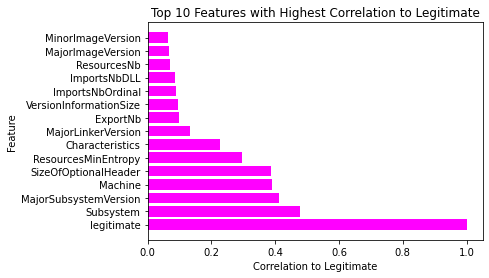

In [12]:
# Select the top 10 features with the highest correlation to 'legitimate'
top_features = data.corr()['legitimate'].nlargest(15)

# Create a horizontal bar chart to visualize the correlation values
plt.barh(top_features.index, top_features.values,color='magenta')

# Set the title and axis labels
plt.title('Top 10 Features with Highest Correlation to Legitimate')
plt.xlabel('Correlation to Legitimate')
plt.ylabel('Feature')

# Display the plot
plt.show()

In [13]:
data.groupby(data['legitimate']).size()

legitimate
0    140849
1     75502
dtype: int64

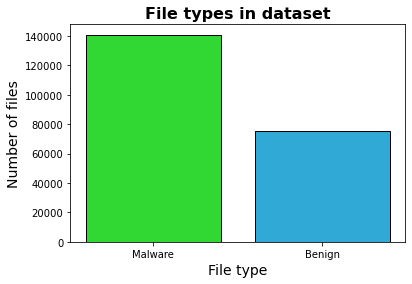

In [14]:
# Get the value counts for the 'legitimate' column
value_counts = data['legitimate'].value_counts()

# Create a bar chart
plt.bar(['Malware', 'Benign'], value_counts, color=['#31D733', '#31A9D7'], edgecolor='k')

# Set the axis labels and title
plt.xlabel('File type', size=14)
plt.ylabel('Number of files', size=14)
plt.title('File types in dataset', size=16, fontweight='bold')

# Display the plot
plt.show()


In [15]:
data['legitimate'].value_counts()*100/len(data)

0    65.102079
1    34.897921
Name: legitimate, dtype: float64

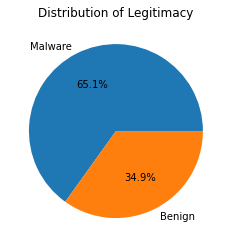

In [16]:
# Create the pie chart
plt.pie(value_counts, labels=['Malware', 'Benign'], autopct='%1.1f%%')

# Add a title
plt.title('Distribution of Legitimacy')

# Show the chart
plt.show()

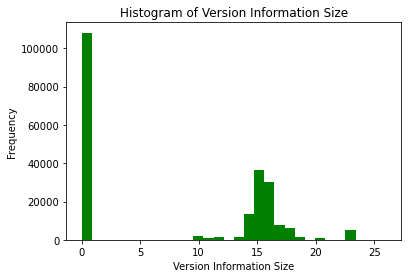

In [17]:
version_info_size = data["VersionInformationSize"]

# Plot a histogram
plt.hist(version_info_size, bins=30, color="green")
plt.xlabel("Version Information Size")
plt.ylabel("Frequency")
plt.title("Histogram of Version Information Size")
plt.show()

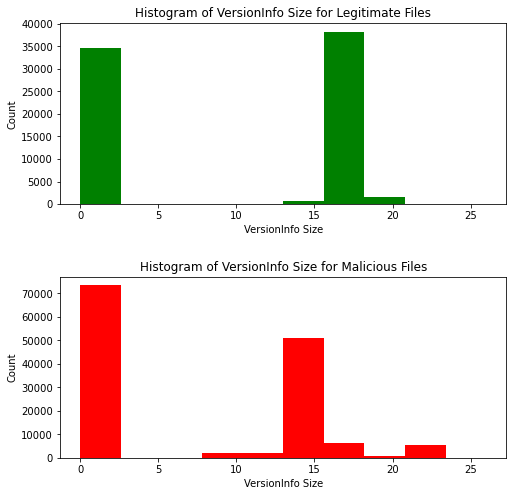

In [18]:

# Separate the legitimate and malicious files
legitimate_files = data[data["legitimate"] == 1]
malicious_files = data[data["legitimate"] == 0]

# Set up the subplots
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

# Plot the histogram for legitimate files
axs[0].hist(legitimate_files["VersionInformationSize"], color="green")
axs[0].set_xlabel("VersionInfo Size")
axs[0].set_ylabel("Count")
axs[0].set_title("Histogram of VersionInfo Size for Legitimate Files")

# Plot the histogram for malicious files
axs[1].hist(malicious_files["VersionInformationSize"], color="red")
axs[1].set_xlabel("VersionInfo Size")
axs[1].set_ylabel("Count")
axs[1].set_title("Histogram of VersionInfo Size for Malicious Files")

# Adjust the spacing between the subplots
plt.subplots_adjust(hspace=0.4)

# Show the plot
plt.show()




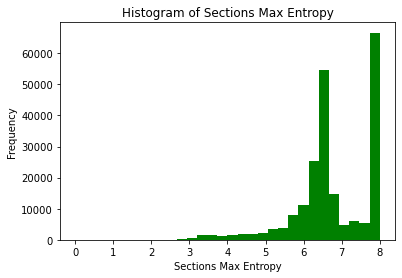

In [19]:
version_info_size = data["SectionsMaxEntropy"]

# Plot a histogram
plt.hist(version_info_size, bins=30, color="green")
plt.xlabel("Sections Max Entropy")
plt.ylabel("Frequency")
plt.title("Histogram of Sections Max Entropy")
plt.show()

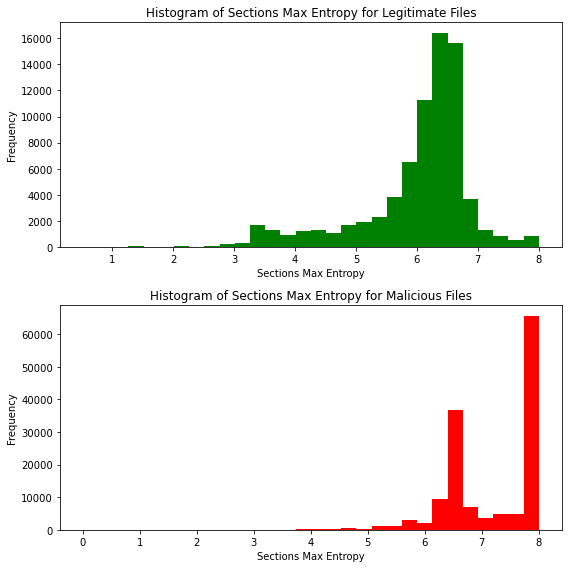

In [20]:
# Create subplots
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

# Plot histogram for legitimate files
axs[0].hist(legitimate_files["SectionsMaxEntropy"], bins=30, color="green")
axs[0].set_xlabel("Sections Max Entropy")
axs[0].set_ylabel("Frequency")
axs[0].set_title("Histogram of Sections Max Entropy for Legitimate Files")

# Plot histogram for malicious files
axs[1].hist(malicious_files["SectionsMaxEntropy"], bins=30, color="red")
axs[1].set_xlabel("Sections Max Entropy")
axs[1].set_ylabel("Frequency")
axs[1].set_title("Histogram of Sections Max Entropy for Malicious Files")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


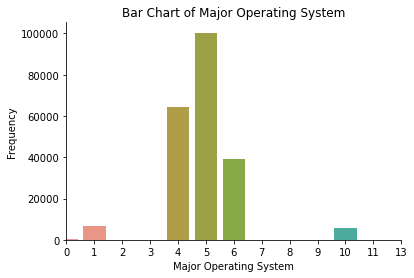

In [21]:
os_counts = data["MajorOperatingSystemVersion"].value_counts()

# Create the bar plot using Seaborn
sns.barplot(x=os_counts.index, y=os_counts.values)
sns.despine()
plt.xlabel("Major Operating System")
plt.ylabel("Frequency")
plt.title("Bar Chart of Major Operating System")
plt.xlim(0, 12)

# Show the plot
plt.show()

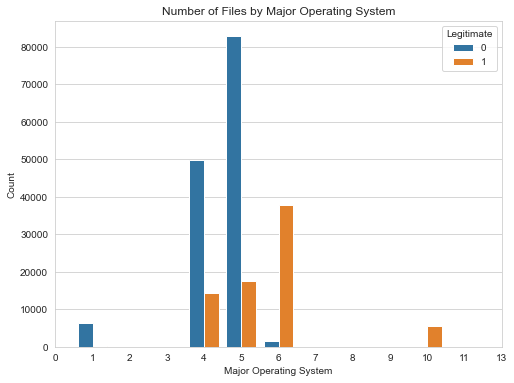

In [22]:


# Set the style of the plot
sns.set_style("whitegrid")

# Filter the dataset based on legitimate and malicious files
legitimate = data[data["legitimate"] == 1]
malicious = data[data["legitimate"] == 0]

# Create the bar plot
plt.figure(figsize=(8,6))
sns.countplot(x="MajorOperatingSystemVersion", data=data, hue="legitimate")
plt.xlim(0, 12) # set the y-axis range to 12

# Add labels and title
plt.xlabel("Major Operating System")
plt.ylabel("Count")
plt.title("Number of Files by Major Operating System")
plt.legend(title="Legitimate", loc="upper right")

plt.show()


In [23]:
sub_counts = data["Subsystem"].value_counts()


In [24]:
sub_counts

2     166566
3      47141
1       2509
16        58
9         57
0         20
Name: Subsystem, dtype: int64

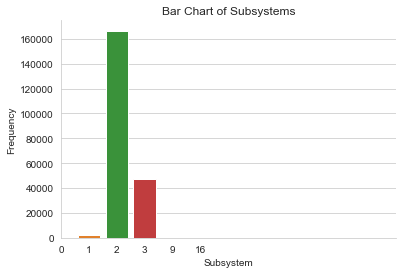

In [25]:
sub_counts = data["Subsystem"].value_counts()

# Create the bar plot using Seaborn
sns.barplot(x=sub_counts.index, y=sub_counts.values)
sns.despine()
plt.xlabel("Subsystem")
plt.ylabel("Frequency")
plt.title("Bar Chart of Subsystems")
plt.xlim(0, 12)

# Show the plot
plt.show()

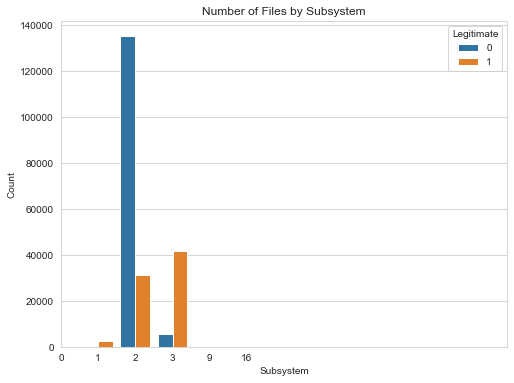

In [26]:
plt.figure(figsize=(8,6))
sns.countplot(x="Subsystem", data=data, hue="legitimate")
plt.xlim(0, 12) # set the y-axis range to 12

# Add labels and title
plt.xlabel("Subsystem")
plt.ylabel("Count")
plt.title("Number of Files by Subsystem")
plt.legend(title="Legitimate", loc="upper right")

plt.show()


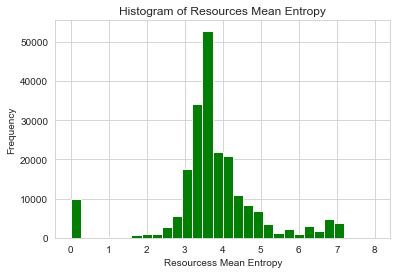

In [27]:
version_info_size = data["ResourcesMeanEntropy"]

# Plot a histogram
plt.hist(version_info_size, bins=30, color="green")
plt.xlabel("Resourcess Mean Entropy")
plt.ylabel("Frequency")
plt.title("Histogram of Resources Mean Entropy")
plt.show()

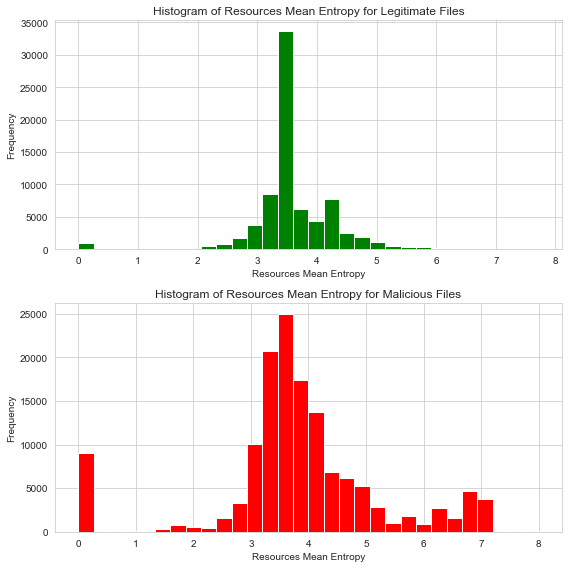

In [28]:
# Create subplots
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

# Plot histogram for legitimate files
axs[0].hist(legitimate_files["ResourcesMeanEntropy"], bins=30, color="green")
axs[0].set_xlabel("Resources Mean Entropy")
axs[0].set_ylabel("Frequency")
axs[0].set_title("Histogram of Resources Mean Entropy for Legitimate Files")

# Plot histogram for malicious files
axs[1].hist(malicious_files["ResourcesMeanEntropy"], bins=30, color="red")
axs[1].set_xlabel("Resources Mean Entropy")
axs[1].set_ylabel("Frequency")
axs[1].set_title("Histogram of Resources Mean Entropy for Malicious Files")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


Dropping columns like Name of the file, MD5 (message digest) and label


In [29]:
# Extracting indepent and dependent variable 
X = data.drop(['ID','md5','legitimate'],axis=1).values
y = data['legitimate'].values

Feature Engineering

Since the number of indepent variable are too high we'll need to do Feature engineering which helps to reduce the number of variables and find the optimum number of variables required for prediction

**ExtraTreesClassifier**
ExtraTreesClassifier fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting

In [30]:
extratrees = sk.ExtraTreesClassifier().fit(X,y)
model = SelectFromModel(extratrees, prefit=True)
X_new = model.transform(X)
nb_features = X_new.shape[1]

In [31]:
print(nb_features)

13


It helps in finding the optimal number of features for classification 

The optimal number of features turn out to be 13

The feature importance of the selected features in asceding order is given below

In [32]:
features = []
index = np.argsort(extratrees.feature_importances_)[::-1][:nb_features]
for f in range(nb_features):
          print("%d. %s (%f)" % (f + 1, data.columns[2+index[f]], extratrees.feature_importances_[index[f]]))
          features.append(data.columns[2 + f])


1. Characteristics (0.146466)
2. DllCharacteristics (0.100058)
3. SectionsMaxEntropy (0.070775)
4. MajorSubsystemVersion (0.063931)
5. Machine (0.060510)
6. Subsystem (0.056903)
7. ImageBase (0.053218)
8. ResourcesMaxEntropy (0.051705)
9. ResourcesMinEntropy (0.041616)
10. VersionInformationSize (0.035329)
11. MajorOperatingSystemVersion (0.026728)
12. ResourcesMeanEntropy (0.021123)
13. SectionsMinEntropy (0.020912)


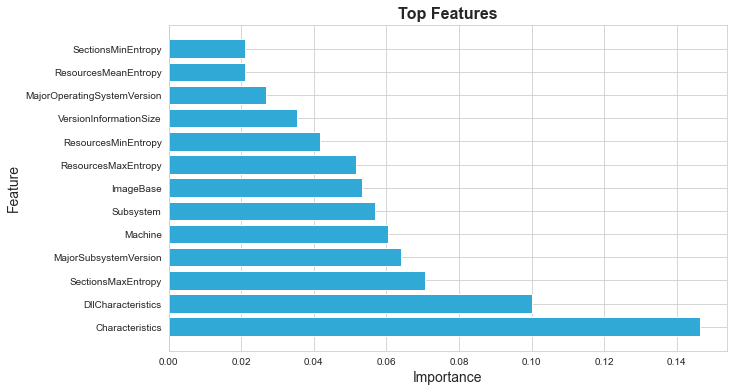

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Get the feature importances
importances = extratrees.feature_importances_
indices = np.argsort(importances)[::-1][:nb_features]

# Get the feature names and their importances
features = [data.columns[2+index[f]] for f in range(nb_features)]
importance_values = [extratrees.feature_importances_[index[f]] for f in range(nb_features)]

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(range(nb_features), importance_values, align='center', color='#31A9D7')
ax.set_yticks(range(nb_features))
ax.set_yticklabels(features)
ax.set_xlabel('Importance', size=14)
ax.set_ylabel('Feature', size=14)
ax.set_title('Top Features', size=16, fontweight='bold')

# Display the plot
plt.show()




We split the dataset into train and test dataset 
with 20% of the dataset being converted into test data

In [34]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_new, y ,test_size=0.2)

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [36]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

#predict the test results
y_pred = classifier.predict(X_test)

#Makeing the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
df_conf_matrix = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'],
                              columns=['Predicted Negative', 'Predicted Positive'])
print(df_conf_matrix)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = classifier.score(X_test, y_test)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)
print("\nAccuracy: %f\nFalse Positive Rate: %f\nFalse Negative Rate: %f\n" % (accuracy, fpr, fnr))


                 Predicted Negative  Predicted Positive
Actual Negative               27724                 360
Actual Positive                 391               14796

Accuracy: 0.982644
False Positive Rate: 0.012819
False Negative Rate: 0.025746



In [37]:
from sklearn.ensemble import AdaBoostClassifier
classifier_2 = AdaBoostClassifier(n_estimators = 50)
classifier_2.fit(X_train, y_train)

#predict the test results
y_pred = classifier_2.predict(X_test)

#Makeing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
df_conf_matrix = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], 
                              columns=['Predicted Negative', 'Predicted Positive'])
print(df_conf_matrix)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = classifier_2.score(X_test, y_test)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)
print("\nAccuracy: %f\nFalse Positive Rate: %f\nFalse Negative Rate: %f\n" % (accuracy, fpr, fnr))


                 Predicted Negative  Predicted Positive
Actual Negative               27109                 975
Actual Positive                1037               14150

Accuracy: 0.953502
False Positive Rate: 0.034717
False Negative Rate: 0.068282



In [38]:
classifier_3 = tree.DecisionTreeClassifier(max_depth=10)
classifier_3.fit(X_train, y_train)

#predict the test results
y_pred = classifier_2.predict(X_test)

#Makeing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
df_conf_matrix = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], 
                              columns=['Predicted Negative', 'Predicted Positive'])
print(df_conf_matrix)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = classifier_3.score(X_test, y_test)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)
print("\nAccuracy: %f\nFalse Positive Rate: %f\nFalse Negative Rate: %f\n" % (accuracy, fpr, fnr))


                 Predicted Negative  Predicted Positive
Actual Negative               27109                 975
Actual Positive                1037               14150

Accuracy: 0.968224
False Positive Rate: 0.034717
False Negative Rate: 0.068282



In [39]:
from sklearn.ensemble import GradientBoostingClassifier
classifier_4 = GradientBoostingClassifier(n_estimators=50)
classifier_4.fit(X_train, y_train)

#predict the test results
y_pred = classifier_4.predict(X_test)

#Makeing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
df_conf_matrix = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], 
                              columns=['Predicted Negative', 'Predicted Positive'])
print(df_conf_matrix)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = classifier_4.score(X_test, y_test)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)
print("\nAccuracy: %f\nFalse Positive Rate: %f\nFalse Negative Rate: %f\n" % (accuracy, fpr, fnr))


                 Predicted Negative  Predicted Positive
Actual Negative               27116                 968
Actual Positive                 869               14318

Accuracy: 0.957547
False Positive Rate: 0.034468
False Negative Rate: 0.057220



In [40]:
from sklearn.naive_bayes import GaussianNB
classifier_5 = GaussianNB()
classifier_5.fit(X_train, y_train)

#predict the test results
y_pred = classifier_5.predict(X_test)

#Makeing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
df_conf_matrix = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'],
                              columns=['Predicted Negative', 'Predicted Positive'])
print(df_conf_matrix)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = classifier_5.score(X_test, y_test)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)
print("\nAccuracy: %f\nFalse Positive Rate: %f\nFalse Negative Rate: %f\n" % (accuracy, fpr, fnr))


                 Predicted Negative  Predicted Positive
Actual Negative               27426                 658
Actual Positive                4643               10544

Accuracy: 0.877493
False Positive Rate: 0.023430
False Negative Rate: 0.305722



In [41]:
classifier_6 = linear_model.LogisticRegression()   
classifier_6.fit(X_train, y_train)

#predict the test results
y_pred = classifier_6.predict(X_test)

#Makeing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
df_conf_matrix = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], 
                              columns=['Predicted Negative', 'Predicted Positive'])
print(df_conf_matrix)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = classifier_6.score(X_test, y_test)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)
print("\nAccuracy: %f\nFalse Positive Rate: %f\nFalse Negative Rate: %f\n" % (accuracy, fpr, fnr))


                 Predicted Negative  Predicted Positive
Actual Negative               26745                1339
Actual Positive                2190               12997

Accuracy: 0.918444
False Positive Rate: 0.047678
False Negative Rate: 0.144202



In [42]:
import lightgbm
from lightgbm import LGBMClassifier

classifier_7 = LGBMClassifier()   
classifier_7.fit(X_train, y_train)

#predict the test results
y_pred = classifier_7.predict(X_test)

#Makeing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
df_conf_matrix = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], 
                              columns=['Predicted Negative', 'Predicted Positive'])
print(df_conf_matrix)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = classifier_7.score(X_test, y_test)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)
print("\nAccuracy: %f\nFalse Positive Rate: %f\nFalse Negative Rate: %f\n" % (accuracy, fpr, fnr))

                 Predicted Negative  Predicted Positive
Actual Negative               27600                 484
Actual Positive                 585               14602

Accuracy: 0.975295
False Positive Rate: 0.017234
False Negative Rate: 0.038520



In [43]:
from sklearn.linear_model import PassiveAggressiveClassifier
classifier_8 = PassiveAggressiveClassifier()
classifier_8.fit(X_train, y_train)

#predict the test results
y_pred = classifier_8.predict(X_test)

#Makeing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
df_conf_matrix = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'],
                              columns=['Predicted Negative', 'Predicted Positive'])
print(df_conf_matrix)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = classifier_8.score(X_test, y_test)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)
print("\nAccuracy: %f\nFalse Positive Rate: %f\nFalse Negative Rate: %f\n" % (accuracy, fpr, fnr))


                 Predicted Negative  Predicted Positive
Actual Negative               26165                1919
Actual Positive                2174               13013

Accuracy: 0.905410
False Positive Rate: 0.068331
False Negative Rate: 0.143149



In [44]:
from sklearn.linear_model import SGDClassifier
classifier_9 = SGDClassifier()
classifier_9.fit(X_train, y_train)

#predict the test results
y_pred = classifier_9.predict(X_test)

#Makeing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
df_conf_matrix = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], 
                              columns=['Predicted Negative', 'Predicted Positive'])
print(df_conf_matrix)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = classifier_9.score(X_test, y_test)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)
print("\nAccuracy: %f\nFalse Positive Rate: %f\nFalse Negative Rate: %f\n" % (accuracy, fpr, fnr))



                 Predicted Negative  Predicted Positive
Actual Negative               26528                1556
Actual Positive                1948               13239

Accuracy: 0.919022
False Positive Rate: 0.055405
False Negative Rate: 0.128268



In [45]:
model = { "DecisionTree":tree.DecisionTreeClassifier(max_depth=10),
         "RandomForest":sk.RandomForestClassifier(n_estimators=50),
         "Adaboost":sk.AdaBoostClassifier(n_estimators=50),
         "GradientBoosting":sk.GradientBoostingClassifier(n_estimators=50),
         "GNB":GaussianNB(),
         "LogisticRegression":linear_model.LogisticRegression(),
         "LGBMClassifier":LGBMClassifier(),
         "PassiveAggressiveClassifier":PassiveAggressiveClassifier(),
         "SGDClassifier":SGDClassifier()
}

In [46]:
results = {}

for algo in model:
    clf = model[algo]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    accuracy = clf.score(X_test, y_test)
    fpr = fp / (fp + tn)
    fnr = fn / (fn + tp)    
    print("%s:\nAccuracy: %f\nFalse Positive Rate: %f\nFalse Negative Rate: %f\n" % (algo, accuracy, fpr, fnr))
    results[algo] = {'accuracy': accuracy, 'false_positive_rate': fpr, 'false_negative_rate': fnr}

DecisionTree:
Accuracy: 0.968224
False Positive Rate: 0.022504
False Negative Rate: 0.048923

RandomForest:
Accuracy: 0.982806
False Positive Rate: 0.013139
False Negative Rate: 0.024692

Adaboost:
Accuracy: 0.953502
False Positive Rate: 0.034717
False Negative Rate: 0.068282

GradientBoosting:
Accuracy: 0.957547
False Positive Rate: 0.034468
False Negative Rate: 0.057220

GNB:
Accuracy: 0.877493
False Positive Rate: 0.023430
False Negative Rate: 0.305722

LogisticRegression:
Accuracy: 0.918444
False Positive Rate: 0.047678
False Negative Rate: 0.144202

LGBMClassifier:
Accuracy: 0.975295
False Positive Rate: 0.017234
False Negative Rate: 0.038520

PassiveAggressiveClassifier:
Accuracy: 0.895542
False Positive Rate: 0.084675
False Negative Rate: 0.141042

SGDClassifier:
Accuracy: 0.921564
False Positive Rate: 0.040664
False Negative Rate: 0.148285



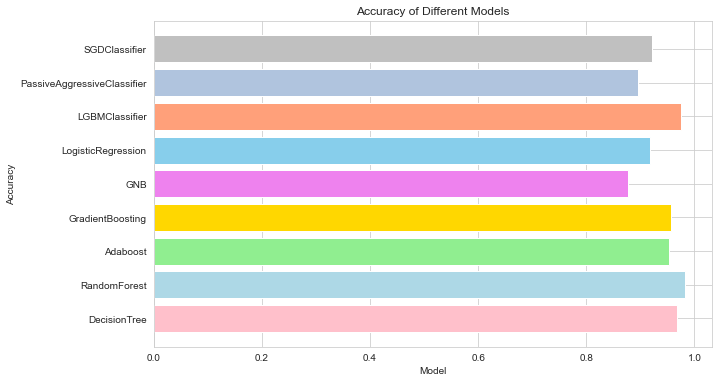

In [47]:
accuracies = [results[algo]['accuracy'] for algo in model]

# Create a bar graph
models = list(results.keys())
accuracies = [results[model]['accuracy'] for model in models]
plt.figure(figsize=(10, 6))
plt.barh(models, accuracies, color=['#FFC0CB', '#ADD8E6', '#90EE90', '#FFD700', '#EE82EE', '#87CEEB', '#FFA07A', '#B0C4DE', '#C0C0C0'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.show()


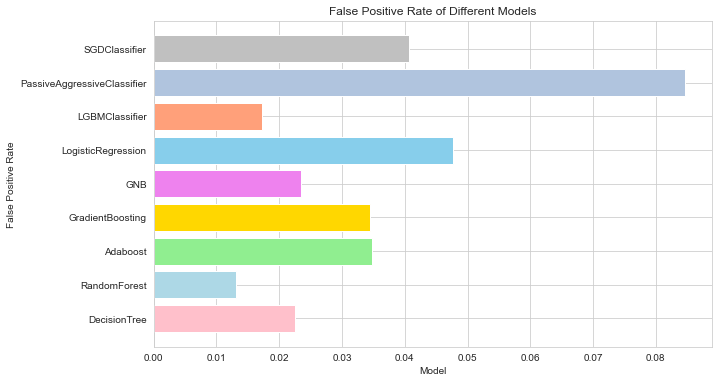

In [48]:
fprs = [results[algo]['false_positive_rate'] for algo in model]

# Create a bar graph
models = list(results.keys())
accuracies = [results[model]['false_positive_rate'] for model in models]
plt.figure(figsize=(10, 6))
plt.barh(models, accuracies, color=['#FFC0CB', '#ADD8E6', '#90EE90', '#FFD700', '#EE82EE', '#87CEEB', '#FFA07A', '#B0C4DE', '#C0C0C0'])
plt.xlabel('Model')
plt.ylabel('False Positive Rate')
plt.title('False Positive Rate of Different Models')
plt.show()

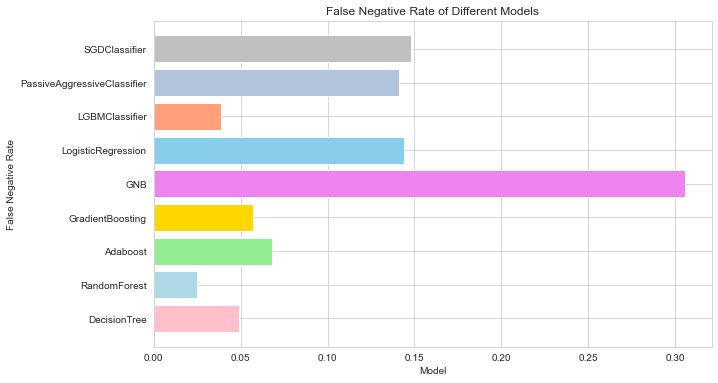

In [49]:
fnrs = [results[algo]['false_negative_rate'] for algo in model]

# Create a bar graph
models = list(results.keys())
accuracies = [results[model]['false_negative_rate'] for model in models]
plt.figure(figsize=(10, 6))
plt.barh(models, accuracies, color=['#FFC0CB', '#ADD8E6', '#90EE90', '#FFD700', '#EE82EE', '#87CEEB', '#FFA07A', '#B0C4DE', '#C0C0C0'])
plt.xlabel('Model')
plt.ylabel('False Negative Rate')
plt.title('False Negative Rate of Different Models')
plt.show()

We find that Random Forest has the highest accuracy and minimum False Positive Rate 

So, it can be the optimum model for detection of malware